<a href="https://colab.research.google.com/github/SiangThien/GDDA612_project1/blob/main/GDDA612_Act2_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# GDDA612 - Activity 2 Part 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pwd

'/content'

In [3]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
pwd

'/content/drive/MyDrive'

In [5]:
ls

 BL-Flickr-Images-Book.csv                      GDDA612_Wk3_Activity.ipynb
'Colab Notebooks'/                             'How to get started with Drive.pdf'
 data_cleaning_data_preprocessing.ipynb         Iris.csv
 GDDA612_Act2_Address_Inconsistent_Data.ipynb   olympics.csv
 GDDA612_Act2_P1.ipynb                          olympics_with_dupl.csv
 GDDA612_Act2_P2.ipynb                          PandasTutorial/
 GDDA612_Act2_Standardize_data_types.ipynb      sample_pandas_normal.csv
 GDDA612_Act2_Text_Data_Cleaning.ipynb          university_towns.txt


In [6]:
# Step 1: Import neccessary library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Step 2: Read Dataset

df = pd.read_csv('BL-Flickr-Images-Book.csv')
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [24]:
# Identify and Handle Missing Values:
# Check for missing values in the dataset.

df.isnull()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,False,True,False,False,False,False,False,False,True,True,True,True,False,False,False
1,False,True,False,False,False,False,False,False,True,True,True,True,False,False,False
2,False,True,False,False,False,False,False,False,True,True,True,True,False,False,False
3,False,True,False,False,False,False,False,False,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8282,False,True,False,False,True,False,False,False,True,True,True,True,False,False,False
8283,False,True,False,False,False,False,False,False,True,True,True,True,False,False,False
8284,False,True,False,False,False,False,False,False,True,True,True,True,False,False,False
8285,False,True,False,False,False,False,False,False,True,True,True,True,False,False,False


In [25]:
df.shape

(8287, 15)

In [26]:
# Assign columns to drop
to_drop = ['Edition Statement',
            'Corporate Author',
            'Corporate Contributors',
            'Former owner',
            'Engraver',
            'Contributors',
            'Issuance type',
            'Shelfmarks']

In [27]:
# To drop columns
df.drop(to_drop, inplace=True, axis=1)

In [28]:
df

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
...,...,...,...,...,...,...,...
8282,4158088,London,1838,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.",http://www.flickr.com/photos/britishlibrary/ta...
8283,4158128,Derby,"1831, 32",M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby",http://www.flickr.com/photos/britishlibrary/ta...
8284,4159563,London,[1806]-22,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...",http://www.flickr.com/photos/britishlibrary/ta...
8285,4159587,Newcastle upon Tyne,1834,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)",http://www.flickr.com/photos/britishlibrary/ta...


In [29]:
# Check for missing values in the dataset by columns
df.isnull().sum()

Identifier                 0
Place of Publication       0
Date of Publication      181
Publisher               4195
Title                      0
Author                  1778
Flickr URL                 0
dtype: int64

In [30]:
# Check for missing values in the dataset for all columns.
df.isnull().sum().sum()

6154

In [31]:
# Filing in Null values
df2 = df.fillna(value = 0)
df2

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
...,...,...,...,...,...,...,...
8282,4158088,London,1838,0,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.",http://www.flickr.com/photos/britishlibrary/ta...
8283,4158128,Derby,"1831, 32",M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby",http://www.flickr.com/photos/britishlibrary/ta...
8284,4159563,London,[1806]-22,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...",http://www.flickr.com/photos/britishlibrary/ta...
8285,4159587,Newcastle upon Tyne,1834,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)",http://www.flickr.com/photos/britishlibrary/ta...


In [32]:
# Check for missing values in the dataset.

df2.isnull().sum().sum()

0

In [ ]:
# Step 3: Sanity check of data


In [33]:
df.shape

(8287, 7)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8287 entries, 206 to 4160339
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Place of Publication  8287 non-null   object 
 1   Date of Publication   7316 non-null   float64
 2   Publisher             4092 non-null   object 
 3   Title                 8287 non-null   object 
 4   Author                6509 non-null   object 
 5   Flickr URL            8287 non-null   object 
dtypes: float64(1), object(5)
memory usage: 711.2+ KB


In [35]:
# Finding missing value
df.isnull().sum()

Identifier                 0
Place of Publication       0
Date of Publication      181
Publisher               4195
Title                      0
Author                  1778
Flickr URL                 0
dtype: int64

In [36]:
df.isnull().sum()/df.shape[0]*100

Identifier               0.000000
Place of Publication     0.000000
Date of Publication      2.184144
Publisher               50.621455
Title                    0.000000
Author                  21.455291
Flickr URL               0.000000
dtype: float64

In [37]:
# Finding duplicates
df.duplicated().sum()

0

In [38]:
# Identifying garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("****10")

Place of Publication
London                             3868
Paris                               479
Edinburgh                           208
New York                            177
Leipzig                             119
                                   ... 
Zalt-Bommel, Nijmegen [printed]       1
Санктпетербург, 1862                 1
Carpi                                 1
Antwerpen                             1
Newcastle upon Tyne                   1
Name: count, Length: 1441, dtype: int64
****10
Date of Publication
1897          157
1896          150
1893          130
1892          127
1898          125
             ... 
[1895-97.]      1
1838-39         1
1854-55         1
[1882, 85]      1
1834-43         1
Name: count, Length: 1148, dtype: int64
****10
Publisher
Macmillan & Co.        85
London                 69
Privately printed      53
Longmans & Co.         52
Hurst & Blackett       51
                       ..
Archibald Constable     1
J. Heaton & Son         1
Bowen-Mer

In [39]:
# Check for Data Integrity

df['Identifier'].is_unique

True

In [40]:
df = df.set_index('Identifier')

# df.set_index('Identifier', inplace=True)

df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [41]:
df.loc[206]

Place of Publication                                               London
Date of Publication                                           1879 [1878]
Publisher                                                S. Tinsley & Co.
Title                                   Walter Forbes. [A novel.] By A. A
Author                                                              A. A.
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 206, dtype: object

In [43]:
df.dtypes.value_counts()

object    6
Name: count, dtype: int64

In [44]:
df.loc[1905:, 'Date of Publication'].head(10)

Identifier
1905           1888
1929    1839, 38-54
2836           1897
2854           1865
2956        1860-63
2957           1873
3017           1866
3131           1899
4598           1814
4884           1820
Name: Date of Publication, dtype: object

In [45]:
# To Address Inconsistent Data

regex = r'^(\d{4})'

In [46]:
extr = df['Date of Publication'].str.extract(r'^(\d{4})', expand=False)
extr.head()

Identifier
206    1879
216    1868
218    1869
472    1851
480    1857
Name: Date of Publication, dtype: object

In [47]:
# To Standarize Data Types

df['Date of Publication'] = pd.to_numeric(extr)
df['Date of Publication'].dtype

dtype('float64')

In [49]:
df['Date of Publication'].isnull().sum() / len(df)

0.11717147339205986

In [50]:
df['Place of Publication'].head(10)

Identifier
206                                  London
216                London; Virtue & Yorston
218                                  London
472                                  London
480                                  London
481                                  London
519                                  London
667     pp. 40. G. Bryan & Co: Oxford, 1898
874                                 London]
1143                                 London
Name: Place of Publication, dtype: object

In [51]:
pub = df['Place of Publication']
london = pub.str.contains('London')
london[:5]

Identifier
206    True
216    True
218    True
472    True
480    True
Name: Place of Publication, dtype: bool

In [66]:
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879.0,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [54]:
oxford = pub.str.contains('Oxford')

In [55]:
df['Place of Publication'] = np.where(london, 'London',
                                      np.where(oxford, 'Oxford',
                                               pub.str.replace('-', ' ')))

df['Place of Publication'].head()

Identifier
206    London
216    London
218    London
472    London
480    London
Name: Place of Publication, dtype: object

In [57]:
df['Place of Publication']

Identifier
206                     London
216                     London
218                     London
472                     London
480                     London
                  ...         
4158088                 London
4158128                  Derby
4159563                 London
4159587    Newcastle upon Tyne
4160339                 London
Name: Place of Publication, Length: 8287, dtype: object

In [62]:
# Exploratory Data Analysis (EDA)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Date of Publication,7316.0,1856.628759,42.483954,1510.0,1842.0,1867.0,1886.0,1915.0


In [63]:
df.describe(include="object")

,Place of Publication,Publisher,Title,Author,Flickr URL
count,8287,4092,8287,6509,8287
unique,1186,1989,8210,5005,8287
top,London,Macmillan & Co.,"[A General Gazetteer, in miniature ... The who...","Shakespeare, William",http://www.flickr.com/photos/britishlibrary/ta...
freq,4219,85,6,48,1


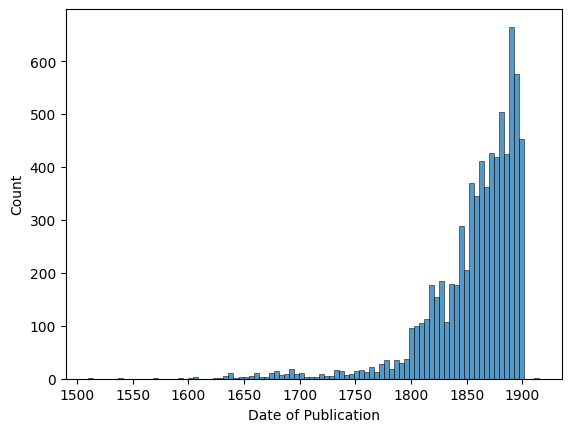

In [60]:
# histogram to understand the distribution
import warnings
warnings.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

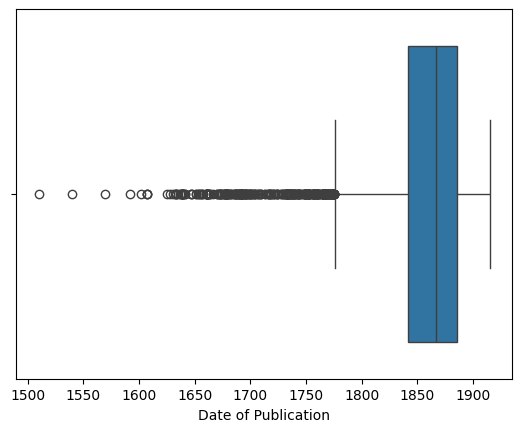

In [64]:
# Boxplot- to identify Outliers

for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()